In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Final_DF.csv")
df.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice_Value
0,0,12346,F,New York,31,38223,2019-09-15,GGOEAAAJ080816,Android Men's Engineer Short Sleeve Tee Charcoal,Apparel,1,19.99,75.00,Used,Sep,SALE30,0.3,0.18,91.51174
1,1,12346,F,New York,31,38223,2019-09-15,GGOEGOAR013099,Google Stylus Pen w/ LED Light,Office,2,5.50,75.00,Used,Sep,OFF30,0.3,0.10,83.47000
2,2,12347,M,New York,20,23979,2019-03-24,GGOEGOAQ020099,Four Color Retractable Pen,Office,1,2.99,14.41,Clicked,Mar,OFF30,0.3,0.10,17.69900
3,3,12347,M,New York,20,23979,2019-03-24,GGOEGOCT019199,Red Spiral Google Notebook,Office,1,9.99,14.41,Used,Mar,OFF30,0.3,0.10,22.10230
4,4,12347,M,New York,20,23980,2019-03-24,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,149.00,6.50,Used,Mar,ELEC30,0.3,0.10,121.23000


### Q1 Understanding how many customers acquired every month

In [3]:
cust_each_month = df[~df.CustomerID.duplicated()].groupby("Month")["CustomerID"].count().reindex(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).reset_index()

In [4]:
cust_each_month.columns = ["Month","Customers_Acquired"]
cust_each_month

,Month,Customers_Acquired
0,Jan,215
1,Feb,96
2,Mar,177
3,Apr,163
4,May,112
5,Jun,137
6,Jul,94
7,Aug,135
8,Sep,78
9,Oct,87


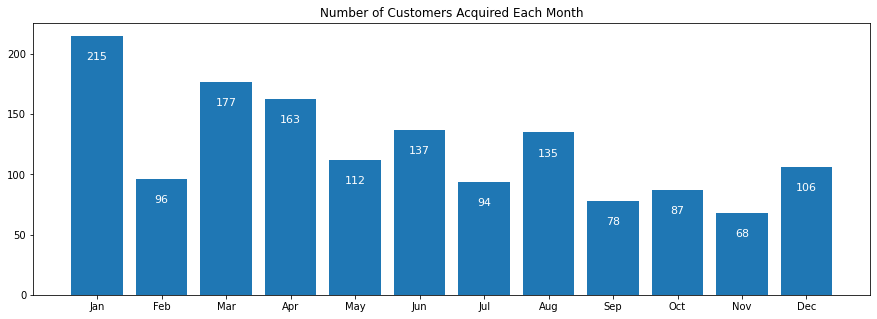

In [5]:
plt.figure(figsize = (15,5))
bars = plt.bar(cust_each_month.Month,cust_each_month.Customers_Acquired)
plt.title("Number of Customers Acquired Each Month")
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 20, str(int(bar.get_height())), 
                 ha='center', color='w', fontsize=11)


### Q2 Understand the retention of customers on month on month basis


In [6]:
# Total customers in each month 
cust_each_month["At_end"] = df.groupby("Month")["CustomerID"].nunique().reindex(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).values

In [7]:
cust_each_month["In_Beginning"] = cust_each_month.At_end.shift(1).fillna(0)

In [8]:
cust_each_month["Retention"] = ((cust_each_month.At_end - cust_each_month.Customers_Acquired)/cust_each_month.In_Beginning)*100

In [9]:
cust_each_month = cust_each_month.fillna(0)

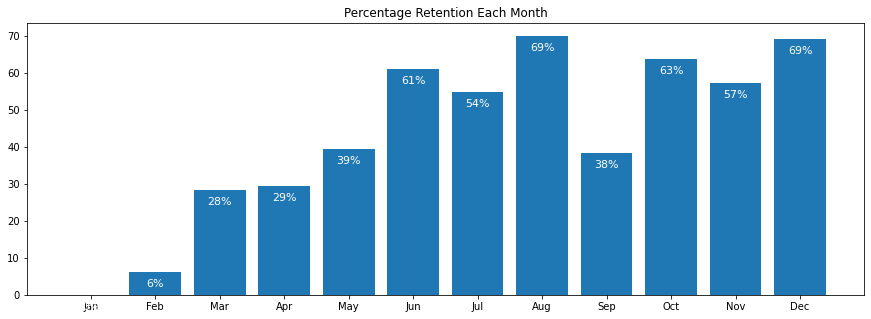

In [10]:
plt.figure(figsize = (15,5))
bars = plt.bar(cust_each_month.Month,cust_each_month.Retention)
plt.title("Percentage Retention Each Month")
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 4, str(int(bar.get_height()))+"%", 
                 ha='center', color='w', fontsize=11)


### Q3 How the revenues from existing/new customers on month on month basis

In [11]:
df.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice_Value
0,0,12346,F,New York,31,38223,2019-09-15,GGOEAAAJ080816,Android Men's Engineer Short Sleeve Tee Charcoal,Apparel,1,19.99,75.00,Used,Sep,SALE30,0.3,0.18,91.51174
1,1,12346,F,New York,31,38223,2019-09-15,GGOEGOAR013099,Google Stylus Pen w/ LED Light,Office,2,5.50,75.00,Used,Sep,OFF30,0.3,0.10,83.47000
2,2,12347,M,New York,20,23979,2019-03-24,GGOEGOAQ020099,Four Color Retractable Pen,Office,1,2.99,14.41,Clicked,Mar,OFF30,0.3,0.10,17.69900
3,3,12347,M,New York,20,23979,2019-03-24,GGOEGOCT019199,Red Spiral Google Notebook,Office,1,9.99,14.41,Used,Mar,OFF30,0.3,0.10,22.10230
4,4,12347,M,New York,20,23980,2019-03-24,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,149.00,6.50,Used,Mar,ELEC30,0.3,0.10,121.23000


In [12]:
# ALL THE CUSTOMERS THAT ARE NEW IN ANY MONTH
df_new = df[~df.CustomerID.duplicated()].groupby("Month")[["CustomerID","Invoice_Value"]].agg({"CustomerID":"count","Invoice_Value":sum}).reindex(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).reset_index()

In [13]:
# ALL THE CUSTOMERS THAT ARE ALREADY CUSTOMERS
df_existing = df[df.CustomerID.duplicated()].groupby("Month")[["CustomerID","Invoice_Value"]].agg({"CustomerID":"count","Invoice_Value":sum}).reindex(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).reset_index()

In [14]:
df_new

,Month,CustomerID,Invoice_Value
0,Jan,215,23283.08453
1,Feb,96,9345.06254
2,Mar,177,15496.83779
3,Apr,163,16217.31630
4,May,112,9626.79384
5,Jun,137,11669.53993
6,Jul,94,9151.11010
7,Aug,135,9521.15880
8,Sep,78,8814.53209
9,Oct,87,11153.22500


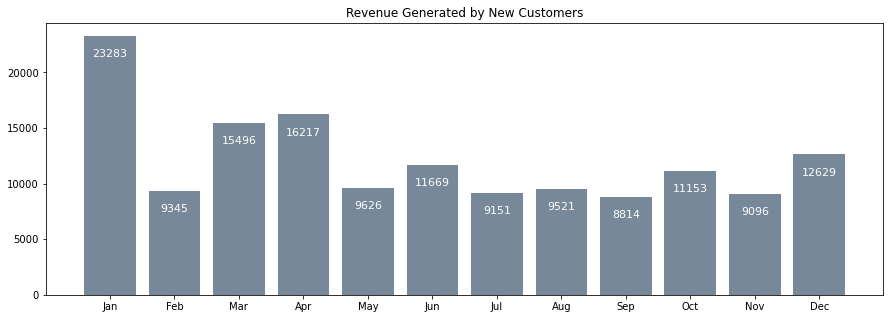

Text(0.5, 1.0, 'Revenue Generated by New Customers')

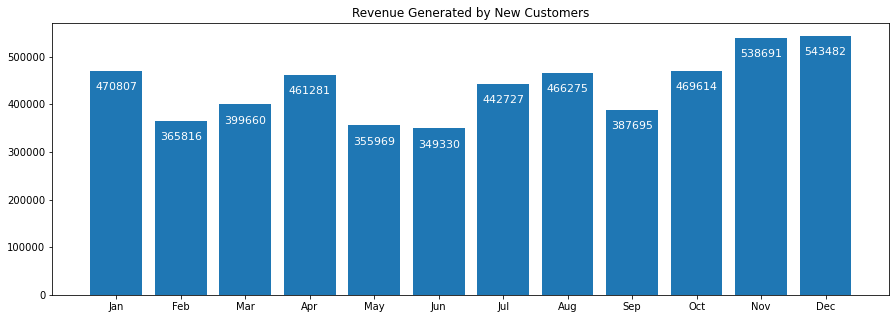

In [15]:
plt.figure(figsize = (15,5))
bars = plt.bar(df_new.Month,df_new.Invoice_Value,color='lightslategrey')
plt.title("Revenue Generated by New Customers")
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 1900, str(int(bar.get_height())), 
                 ha='center', color='w', fontsize=11)
plt.show()

plt.figure(figsize=(15,5))
bars = plt.bar(df_new.Month,df_existing.Invoice_Value)
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 40000, str(int(bar.get_height())), 
                 ha='center', color='w', fontsize=11)
plt.title("Revenue Generated by New Customers")

### Q4 How the discounts playing role in the revenues?

### Q5 Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc…

In [16]:
df.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice_Value
0,0,12346,F,New York,31,38223,2019-09-15,GGOEAAAJ080816,Android Men's Engineer Short Sleeve Tee Charcoal,Apparel,1,19.99,75.00,Used,Sep,SALE30,0.3,0.18,91.51174
1,1,12346,F,New York,31,38223,2019-09-15,GGOEGOAR013099,Google Stylus Pen w/ LED Light,Office,2,5.50,75.00,Used,Sep,OFF30,0.3,0.10,83.47000
2,2,12347,M,New York,20,23979,2019-03-24,GGOEGOAQ020099,Four Color Retractable Pen,Office,1,2.99,14.41,Clicked,Mar,OFF30,0.3,0.10,17.69900
3,3,12347,M,New York,20,23979,2019-03-24,GGOEGOCT019199,Red Spiral Google Notebook,Office,1,9.99,14.41,Used,Mar,OFF30,0.3,0.10,22.10230
4,4,12347,M,New York,20,23980,2019-03-24,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,149.00,6.50,Used,Mar,ELEC30,0.3,0.10,121.23000


#### By Product Category

In [17]:
# By product Category
df_category = df.groupby("Product_Category").agg({"Invoice_Value":"sum","Transaction_ID":"count"}).round().reset_index()

In [18]:
df_category["Average Order Value"] = df_category.Invoice_Value/df_category.Transaction_ID

In [19]:
df_category.columns = ['Product_Category', 'Invoice_Value', 'Transaction_ID(Count)',
       'Average Order Value']

In [20]:
df_category

,Product_Category,Invoice_Value,Transaction_ID(Count),Average Order Value
0,Accessories,10199.0,234,43.585470
1,Android,1116.0,43,25.953488
2,Apparel,827829.0,18126,45.670804
3,Backpacks,10813.0,89,121.494382
4,Bags,193627.0,1882,102.883634
5,Bottles,10172.0,268,37.955224
6,Drinkware,272622.0,3483,78.272179
7,Fun,8995.0,160,56.218750
8,Gift Cards,19447.0,159,122.308176
9,Google,13169.0,105,125.419048


#### By Month

In [21]:
df_month = df.groupby("Month").agg({"Invoice_Value":"sum","Transaction_ID":"count"}).round().reindex(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

In [22]:
df_month["Average Order Value"] = df_month.Invoice_Value/df_month.Transaction_ID

In [23]:
df_month.columns = ['Invoice_Value', 'Transaction_ID(Count)',
       'Average Order Value']

In [24]:
df_month.reset_index()

,Month,Invoice_Value,Transaction_ID(Count),Average Order Value
0,Jan,494091.0,4063,121.607433
1,Feb,375162.0,3284,114.239342
2,Mar,415158.0,4346,95.526461
3,Apr,477499.0,4150,115.060000
4,May,365596.0,4572,79.964129
5,Jun,361000.0,4193,86.095874
6,Jul,451878.0,5251,86.055608
7,Aug,475797.0,6150,77.365366
8,Sep,396510.0,4288,92.469683
9,Oct,480767.0,4164,115.457973


#### By week

In [25]:
df["Date"] = pd.to_datetime(df["Transaction_Date"])

In [26]:
df["Week"] = df.Date.dt.isocalendar().week

In [27]:
df_week = df.groupby("Week").agg({"Invoice_Value":"sum","Transaction_ID":"count"})
df_week["Average Order Value"] = df_week.Invoice_Value/df_week.Transaction_ID
df_week.columns = ['Invoice_Value', 'Transaction_ID(Count)',
       'Average Order Value']
df_week.reset_index()

,Week,Invoice_Value,Transaction_ID(Count),Average Order Value
0,1,131077.87837,1056,124.126779
1,2,104569.21104,829,126.138976
2,3,106868.31322,842,126.921987
3,4,109560.62304,943,116.183057
4,5,105695.03401,926,114.141505
5,6,89697.85810,749,119.756820
6,7,101107.17060,881,114.764098
7,8,98127.24106,876,112.017398
8,9,83657.95910,810,103.281431
9,10,92773.01870,1012,91.672943


### Q6 Understand the trends/seasonality of sales by category, location, month etc…

Text(0.5, 1.0, 'Sales for different locations')

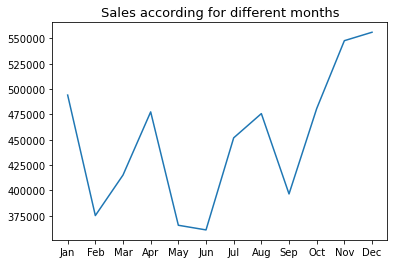

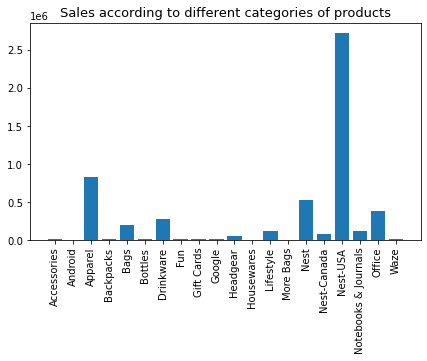

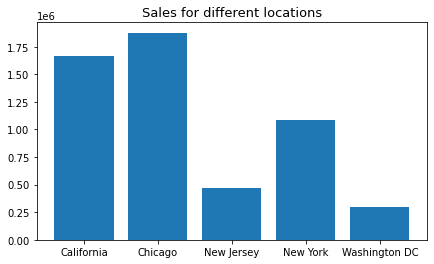

In [48]:
month = df.groupby("Month")["Invoice_Value"].sum().reindex(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).reset_index()
category = df.groupby("Product_Category")["Invoice_Value"].sum().reset_index()
plt.plot(month.Month,month.Invoice_Value)
plt.title("Sales according for different months",size=13)

plt.figure(figsize=(7,4))
plt.bar(category.Product_Category,category.Invoice_Value)
xaxis = plt.gca().xaxis
for item in xaxis.get_ticklabels():
    # we can use artist methods or function on these tick labels
    item.set_rotation(90)
plt.title("Sales according to different categories of products",size=13)    


location = df.groupby("Location")["Invoice_Value"].sum().reset_index()
plt.figure(figsize=(7,4))
plt.bar(location.Location,location.Invoice_Value)
plt.title("Sales for different locations",size=13)

### Q7 How number order varies and sales with different days?

In [29]:
import calendar
df["Day"] = df.Date.dt.weekday.apply(lambda x: calendar.day_abbr[x])

Text(0.5, 1.0, 'Sales according to different categories of products')

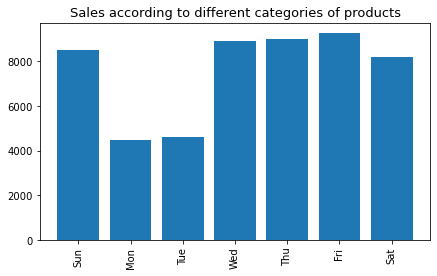

In [42]:
orders = df.groupby("Day")["Transaction_ID"].count().reindex(["Sun","Mon","Tue","Wed","Thu","Fri","Sat"]).reset_index()
plt.figure(figsize=(7,4))
plt.bar(orders.Day,orders.Transaction_ID)
xaxis = plt.gca().xaxis
for item in xaxis.get_ticklabels():
    # we can use artist methods or function on these tick labels
    item.set_rotation(90)
plt.title("Number of orders placed on each day",size=13) 

Text(0.5, 1.0, 'Total Sale on each day')

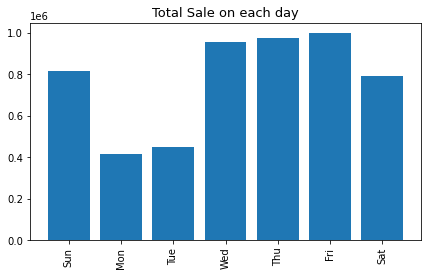

In [47]:
sales = df.groupby("Day")["Invoice_Value"].sum().reindex(["Sun","Mon","Tue","Wed","Thu","Fri","Sat"]).reset_index()
plt.figure(figsize=(7,4))
plt.bar(sales.Day,sales.Invoice_Value)
xaxis = plt.gca().xaxis
for item in xaxis.get_ticklabels():
    # we can use artist methods or function on these tick labels
    item.set_rotation(90)
plt.title("Total Sale on each day",size=13) 

### Q8 Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month.

#### % of Marketing Spend

In [50]:
marketing_spend = pd.read_csv("Datasets/Marketing_Spend.csv")

In [51]:
marketing_spend["Date"] = pd.to_datetime(marketing_spend["Date"])
marketing_spend["Month"] = marketing_spend["Date"].dt.month.apply(lambda x:calendar.month_abbr[x])
marketing_spend["Total_Spend"] = marketing_spend.Offline_Spend+ marketing_spend.Online_Spend

In [56]:
Revenue = df.groupby("Month")["Invoice_Value"].sum().reindex(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).reset_index()

In [60]:
ms = marketing_spend.groupby("Month")["Total_Spend"].sum().reindex(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).reset_index()

In [67]:
data = pd.merge(Revenue,ms,on="Month",how="outer")
data.columns = ["Month","Revenue","Marketing_Spend"]

In [75]:
data["Pct_Spend"] = (data.Marketing_Spend/data.Revenue)*100

In [76]:
data

,Month,Revenue,Marketing_Spend,Pct_Spend
0,Jan,494090.54875,154928.95,31.356388
1,Feb,375162.04730,137107.92,36.546319
2,Mar,415157.79044,122250.09,29.446657
3,Apr,477498.59102,157026.83,32.885297
4,May,365596.02956,118259.64,32.347080
5,Jun,361000.17429,134318.14,37.207223
6,Jul,451878.40904,120217.85,26.604026
7,Aug,475796.87554,142904.15,30.034697
8,Sep,396510.49254,135514.54,34.176785
9,Oct,480767.36981,151224.65,31.454849


#### % of delivery charges by month

In [88]:
dlvry = df.groupby("Month")[["Delivery_Charges","Invoice_Value"]].sum().reindex(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).reset_index()
dlvry["Pct_Delivery_Charge"]=dlvry.Delivery_Charges/dlvry.Invoice_Value*100
dlvry

,Month,Delivery_Charges,Invoice_Value,Pct_Delivery_Charge
0,Jan,59242.32,494090.54875,11.990175
1,Feb,49216.60,375162.04730,13.118758
2,Mar,60799.94,415157.79044,14.645020
3,Apr,41481.74,477498.59102,8.687301
4,May,41396.17,365596.02956,11.322927
5,Jun,37513.58,361000.17429,10.391568
6,Jul,48723.93,451878.40904,10.782531
7,Aug,61099.57,475796.87554,12.841524
8,Sep,41005.42,396510.49254,10.341572
9,Oct,45961.88,480767.36981,9.560108


### Q9 How marketing spend is impacting on revenue?

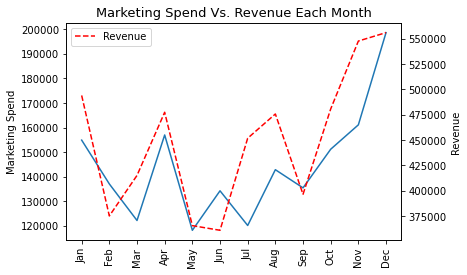

In [120]:
data
fig, ax = plt.subplots()
ax.plot(data.Month,data.Marketing_Spend,label="Marketing Spend")
xaxis = plt.gca().xaxis
for item in xaxis.get_ticklabels():
    # we can use artist methods or function on these tick labels
    item.set_rotation(90)
ax.set_ylabel("Marketing Spend")
    
ax2 = ax.twinx()
ax2.plot(data.Month,data.Revenue,"--r",label="Revenue")
ax2.set_ylabel("Revenue")
# plt.plot(data.Month,data.Revenue)
plt.title("Marketing Spend Vs. Revenue Each Month",size=13) 
plt.legend()

### Q10 Which product was appeared in the transactions

In [130]:
df.groupby("Product_Description")["Transaction_ID"].count().idxmax()

'Nest Learning Thermostat 3rd Gen-USA - Stainless Steel'

### Q11 Which product was purchased mostly based on the quantity?

In [141]:
df.groupby("Product_Description")["Quantity"].sum().idxmax()

'Maze Pen'